In [17]:
import numpy as np
from scipy.optimize import curve_fit

# g: 중력 가속도
g = 9.80665

# 물리 모델 정의
def range_model(angle_deg, v0, h):
    theta = np.radians(angle_deg)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    sqrt_term = np.sqrt((v0 * sin_theta)**2 + 2 * g * h)
    return (v0 * cos_theta / g) * (v0 * sin_theta + sqrt_term)

# 데이터
angles = np.array([-5, 0, 5, 10])  # degrees
ranges = np.array([
    21.284868592922912,
    42.59334348323507,
    82.58268208801229,
    130.18636121187322
])

# 초기 추정값: v0=100 m/s, h=10 m
initial_guess = [100, 10]

# 최적화 수행
popt, _ = curve_fit(range_model, angles, ranges, p0=initial_guess)

# 결과
v0_est, h_est = popt
print(f"Estimated v0: {v0_est:.4f} m/s")
print(f"Estimated height: {h_est:.4f} m")


Estimated v0: 57.9947 m/s
Estimated height: 2.6369 m


In [18]:
# Estimated v0: 57.9947 m/s
# Estimated height: 2.6369 m
# 기반 예측 함수 정의

import numpy as np

# 중력 상수
g = 9.80665

# 추정된 값
v0_est = 57.9947
h_est = 2.6369

# 예측 함수
def predict_range(angle_deg):
    theta = np.radians(angle_deg)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    sqrt_term = np.sqrt((v0_est * sin_theta)**2 + 2 * g * h_est)
    return (v0_est * cos_theta / g) * (v0_est * sin_theta + sqrt_term)

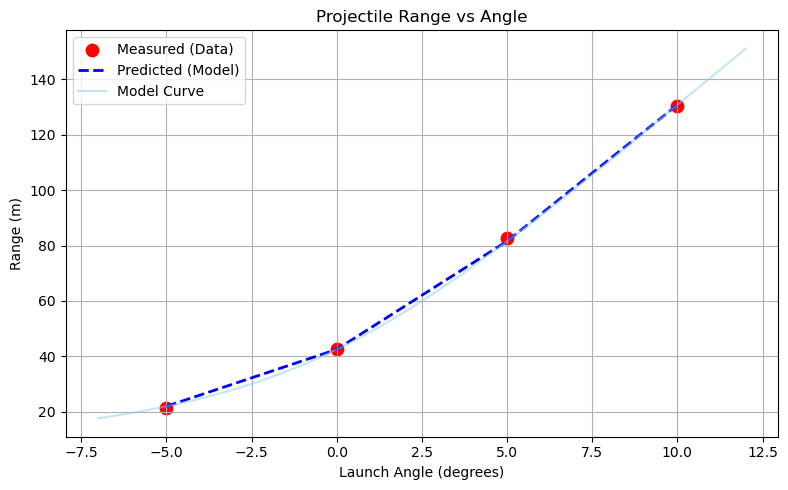

In [22]:
# 시각화 코드 (실제값 vs 예측값)

import matplotlib.pyplot as plt

# 예시: 데이터 (각도 및 실제 거리)
angles = np.array([-5, 0, 5, 10])
ranges = np.array([
    21.284868592922912,
    42.59334348323507,
    82.58268208801229,
    130.18636121187322
])

# 예측 거리 계산
predicted = np.array([predict_range(a) for a in angles])

# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(angles, ranges, color='red', label='Measured (Data)', s=80)
plt.plot(angles, predicted, color='blue', linestyle='--', label='Predicted (Model)', linewidth=2)

# 예측 범위 전체 라인 (보간)
angle_sweep = np.linspace(min(angles)-2, max(angles)+2, 200)
predicted_line = [predict_range(a) for a in angle_sweep]
plt.plot(angle_sweep, predicted_line, color='skyblue', alpha=0.5, label='Model Curve')

plt.xlabel("Launch Angle (degrees)")
plt.ylabel("Range (m)")
plt.title("Projectile Range vs Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 일단 완성한듯!??

In [26]:
# 이제 반대로 원하는 거리로부터 설정해야 할 각도를 추출해 보자

from scipy.optimize import minimize_scalar
import numpy as np


# 거리로부터 각도를 추정하는 함수
def estimate_angle_from_range(target_range):
    def objective(theta_deg):
        predicted = predict_range(theta_deg)
        return abs(predicted - target_range)
    
    result = minimize_scalar(objective, bounds=(-10, 45), method='bounded')
    return result.x  # 추정된 각도 (deg)

In [28]:
target_distance = float(input("예측하고자 하는 거리 (m): "))
estimated_angle = estimate_angle_from_range(target_distance)
print(f"설정해야 할 발사각: {estimated_angle:.2f} degrees")

예측하고자 하는 거리 (m):  90


설정해야 할 발사각: 5.90 degrees
